In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [87]:
pca_1 = pd.read_csv('data/pca_2.csv')

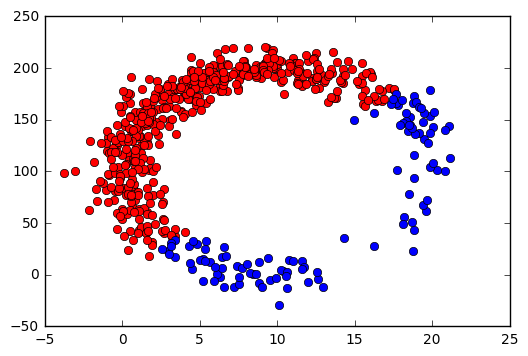

In [88]:
#plot for getting an overview
plt.plot(pca_1.loc[pca_1.class_labels == 1,'x'], pca_1.loc[pca_1.class_labels == 1, 'y'], 'ro')
plt.plot(pca_1.loc[pca_1.class_labels == 0,'x'], pca_1.loc[pca_1.class_labels == 0, 'y'], 'bo')
plt.show()

In [89]:
#split class labels and other columns
pca_classlabels = pca_1.class_labels
pca_1 = pca_1[['x', 'y']]

In [90]:
#scale data
std = StandardScaler(with_mean=True, with_std=True)
std.fit(pca_1)
pca_1_transformed = std.transform(pca_1)

In [92]:
#do pca trasformation and restore old structure (with columns names and class labels)
pca_1_rotated = PCA(n_components = pca_1_transformed.shape[1]).fit_transform(pca_1_transformed)

pca_1['class_labels'] = pca_classlabels
pca_1['x'] = pca_1_rotated[:,0]
pca_1['y'] = pca_1_rotated[:,1]

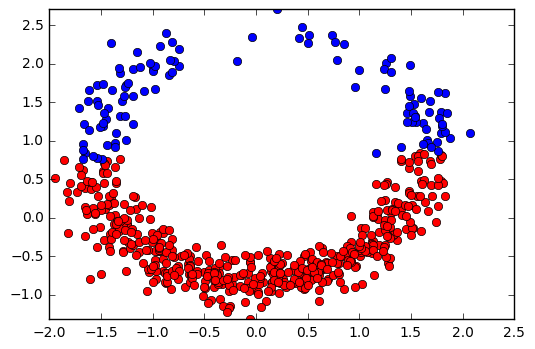

In [94]:
#plot result for evaluation
plt.plot(pca_1.loc[pca_1.class_labels == 1,'x'], pca_1.loc[pca_1.class_labels == 1, 'y'], 'ro')
plt.plot(pca_1.loc[pca_1.class_labels == 0,'x'], pca_1.loc[pca_1.class_labels == 0, 'y'], 'bo')
plt.ylim(np.amin(pca_1.y), np.amax(pca_1.y))
plt.show()